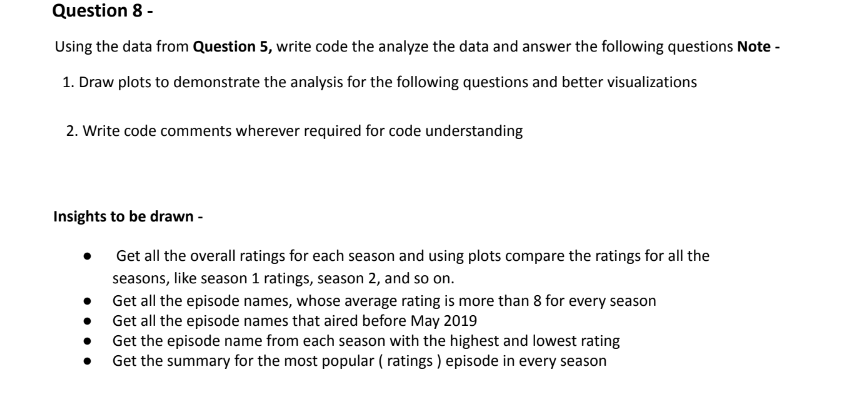

Import Libaries

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Let's get the data from the Question 5 as asked by the Question. 

In [105]:
df = pd.read_csv("ShowRating.csv")

In [106]:
df.head()

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,summary,_links,average-rating,medium_image_link,original_image_link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00:00 PM,2016-10-03T01:00:00+00:00,68.0,A woman named Dolores is a free spirit in the ...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00:00 PM,2016-10-10T01:00:00+00:00,60.0,Bernard suspects that someone is sabotaging th...,{'self': {'href': 'https://api.tvmaze.com/epis...,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00:00 PM,2016-10-17T01:00:00+00:00,60.0,Bernard continues to investigate Dolores' supp...,{'self': {'href': 'https://api.tvmaze.com/epis...,7.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00:00 PM,2016-10-24T01:00:00+00:00,60.0,While Dolores joins William and Logan on their...,{'self': {'href': 'https://api.tvmaze.com/epis...,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00:00 PM,2016-10-31T01:00:00+00:00,60.0,Dolores takes the first step on her path of di...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   36 non-null     int64  
 1   url                  36 non-null     object 
 2   name                 36 non-null     object 
 3   season               36 non-null     int64  
 4   number               36 non-null     int64  
 5   type                 36 non-null     object 
 6   airdate              36 non-null     object 
 7   airtime              36 non-null     object 
 8   airstamp             36 non-null     object 
 9   runtime              36 non-null     float64
 10  summary              36 non-null     object 
 11  _links               36 non-null     object 
 12  average-rating       36 non-null     float64
 13  medium_image_link    36 non-null     object 
 14  original_image_link  36 non-null     object 
dtypes: float64(2), int64(3), object(10)
memory

## Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

In [108]:
df_copy = df.copy()

Let's see how these columns look

In [109]:
df_copy[['season', 'average-rating']]

,season,average-rating
0,1,8.0
1,1,7.7
2,1,7.6
3,1,7.9
4,1,8.0
5,1,8.0
6,1,8.6
7,1,7.9
8,1,8.5
9,1,8.7


Let's group these 2 columns together but also get the sum of all the ratings per season

In [110]:
df.groupby(['season'])['average-rating'].sum().sort_values(ascending=False)

season
1    80.9
2    80.0
3    62.2
4    60.3
Name: average-rating, dtype: float64

Now, let's turn it into a dataframe using reset_index()

In [111]:
df_season_rating = df.groupby(['season'])['average-rating'].sum().sort_values(ascending=False).reset_index()

In [112]:
df_season_rating.head()

,season,average-rating
0,1,80.9
1,2,80.0
2,3,62.2
3,4,60.3


Let's plot this now

<AxesSubplot:xlabel='season', ylabel='average-rating'>

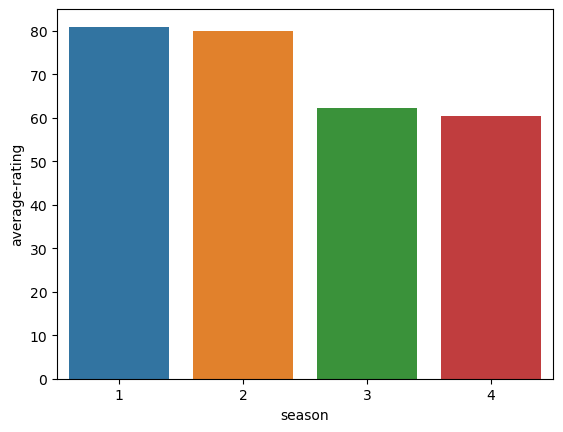

In [113]:
sns.barplot(x='season', y='average-rating', data=df_season_rating)

##### Conclusion: As we can see Season 1 had the highest Overall rating, followed by season 2, 3, and 4 respectively. 

## Get all the episode names, whose average rating is more than 8 for every season

In [114]:
df_copy[['name', 'average-rating']]

,name,average-rating
0,The Original,8.0
1,Chestnut,7.7
2,The Stray,7.6
3,Dissonance Theory,7.9
4,Contrapasso,8.0
5,The Adversary,8.0
6,Trompe L'Oeil,8.6
7,Trace Decay,7.9
8,The Well-Tempered Clavier,8.5
9,The Bicameral Mind,8.7


In [115]:
df_high_rating = df_copy[df_copy['average-rating']>8.0].reset_index()

In [116]:
df_high_rating[['name', 'average-rating', 'season']]

,name,average-rating,season
0,Trompe L'Oeil,8.6,1
1,The Well-Tempered Clavier,8.5,1
2,The Bicameral Mind,8.7,1
3,Kiksuya,8.7,2
4,Vanishing Point,8.4,2
5,The Passenger,8.5,2


##### Conclusion: The Above is the table of all the episodes from each season that has average-rating more than 8.0

We can conclude from this that Season 1 has been liked and well recieved by most people. It has had the 4 highest rating episodes. 

Second season of this show was also highly well recieved by the public as it also has one episode named 'Kiksuya' with the highest ratings, standing side by side with The Episode named 'The Bicameral Mind' of season 1. 

## Get all the episode names that aired before May 2019

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   36 non-null     int64  
 1   url                  36 non-null     object 
 2   name                 36 non-null     object 
 3   season               36 non-null     int64  
 4   number               36 non-null     int64  
 5   type                 36 non-null     object 
 6   airdate              36 non-null     object 
 7   airtime              36 non-null     object 
 8   airstamp             36 non-null     object 
 9   runtime              36 non-null     float64
 10  summary              36 non-null     object 
 11  _links               36 non-null     object 
 12  average-rating       36 non-null     float64
 13  medium_image_link    36 non-null     object 
 14  original_image_link  36 non-null     object 
dtypes: float64(2), int64(3), object(10)
memory

Again, due to using the data from Question5, It is giving us error to get the year as a datetime format.

So, I will change the datatype of this column to String and then get the year using string slicing.

In [118]:
df_copy['airdate'] = df_copy['airdate'].astype('str')

In [119]:
df_copy['year'] = [int(i[:4]) for i in df_copy['airdate']]

In [120]:
df_copy.head()

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,summary,_links,average-rating,medium_image_link,original_image_link,year
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00:00 PM,2016-10-03T01:00:00+00:00,68.0,A woman named Dolores is a free spirit in the ...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,2016
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00:00 PM,2016-10-10T01:00:00+00:00,60.0,Bernard suspects that someone is sabotaging th...,{'self': {'href': 'https://api.tvmaze.com/epis...,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,2016
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00:00 PM,2016-10-17T01:00:00+00:00,60.0,Bernard continues to investigate Dolores' supp...,{'self': {'href': 'https://api.tvmaze.com/epis...,7.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,2016
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00:00 PM,2016-10-24T01:00:00+00:00,60.0,While Dolores joins William and Logan on their...,{'self': {'href': 'https://api.tvmaze.com/epis...,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,2016
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00:00 PM,2016-10-31T01:00:00+00:00,60.0,Dolores takes the first step on her path of di...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,2016


In [121]:
df_2019 = df_copy[df_copy['year']<2019]

In [122]:
df_2019[['name', 'season', 'average-rating']]

,name,season,average-rating
0,The Original,1,8.0
1,Chestnut,1,7.7
2,The Stray,1,7.6
3,Dissonance Theory,1,7.9
4,Contrapasso,1,8.0
5,The Adversary,1,8.0
6,Trompe L'Oeil,1,8.6
7,Trace Decay,1,7.9
8,The Well-Tempered Clavier,1,8.5
9,The Bicameral Mind,1,8.7


##### Conclusion: It can be concluded that Only season 1 and season 2 were released by the year 2019.

## Get the episode name from each season with the highest and lowest rating

Let's first group all the required column and make it into a different dataframe

In [123]:
df_copy.groupby(['name', 'season'])['average-rating'].max().reset_index().sort_values('season')

,name,season,average-rating
30,Trace Decay,1,7.9
24,The Original,1,8.0
22,The Bicameral Mind,1,8.7
28,The Well-Tempered Clavier,1,8.5
20,The Adversary,1,8.0
31,Trompe L'Oeil,1,8.6
27,The Stray,1,7.6
2,Chestnut,1,7.7
3,Contrapasso,1,8.0
6,Dissonance Theory,1,7.9


In [124]:
a = df_copy.groupby(['name', 'season', 'summary'])['average-rating'].sum().reset_index().sort_values('season').reset_index(drop='index')

In [125]:
a

,name,season,summary,average-rating
0,Trace Decay,1,Bernard tries to cope with what he did under R...,7.9
1,The Original,1,A woman named Dolores is a free spirit in the ...,8.0
2,The Bicameral Mind,1,Delores finds out the truth about William's fa...,8.7
3,The Well-Tempered Clavier,1,Bernard forces Robert to take him back into hi...,8.5
4,The Adversary,1,"While Maeve convinces Felix to show her ""upsta...",8.0
5,Trompe L'Oeil,1,While William and Dolores travel to the unclai...,8.6
6,The Stray,1,Bernard continues to investigate Dolores' supp...,7.6
7,Chestnut,1,Bernard suspects that someone is sabotaging th...,7.7
8,Contrapasso,1,Dolores takes the first step on her path of di...,8.0
9,Dissonance Theory,1,While Dolores joins William and Logan on their...,7.9


Now, what we can do is, get a list of all the ratings per season one by one.

In [126]:
a[['name', 'average-rating']][10:20]

,name,average-rating
10,Vanishing Point,8.4
11,The Passenger,8.5
12,Virtù e Fortuna,7.7
13,Reunion,7.7
14,Phase Space,7.7
15,Akane No Mai,7.6
16,The Riddle of the Sphinx,8.0
17,Les Écorchés,7.9
18,Kiksuya,8.7
19,Journey Into Night,7.8


Storing all season's min and max rating for a new dataframe

In [127]:
s1_min = min(a[:10]['average-rating'])
s1_max = max(a[:10]['average-rating'])
s2_max = max(a[10:20]['average-rating'])
s2_min = min(a[10:20]['average-rating'])
s3_max = max(a[20:28]['average-rating'])
s3_min = min(a[20:28]['average-rating'])
s4_max = max(a[28:]['average-rating'])
s4_min = min(a[28:]['average-rating'])

In [128]:
a[10:20].loc[a['average-rating'] == s2_max, 'name'].values[0]

'Kiksuya'

Now getting the names of each episode using loc

In [129]:
s1_max_ep = a[0:10].loc[a['average-rating'] == s1_max, 'name'].values[0]
s2_max_ep = a[10:20].loc[a['average-rating'] == s2_max, 'name'].values[0]
s3_max_ep = a[20:28].loc[a['average-rating'] == s3_max, 'name'].values[0]
s4_max_ep = a[28:].loc[a['average-rating'] == s4_max, 'name'].values[0]
s1_min_ep = a[0:10].loc[a['average-rating'] == s1_min, 'name'].values[0]
s2_min_ep = a[10:20].loc[a['average-rating'] == s2_min, 'name'].values[0]
s3_min_ep = a[20:28].loc[a['average-rating'] == s3_min, 'name'].values[0]
s4_min_ep = a[28:].loc[a['average-rating'] == s4_min, 'name'].values[0]


Creating a dict for the new dataframe

In [130]:
rating_dict = {'all_rating': [s1_min, s1_max, s2_min, s2_max, s3_min, s3_max,s4_min, s4_max],
               'season': [1, 1, 2, 2, 3, 3, 4, 4],
               'Episode_Name': [s1_min_ep, s1_max_ep, s2_min_ep, s2_max_ep, s3_min_ep, s3_max_ep, s4_min_ep, s4_max_ep]}

In [131]:
new_df = pd.DataFrame(rating_dict)

In [132]:
new_df

,all_rating,season,Episode_Name
0,7.6,1,The Stray
1,8.7,1,The Bicameral Mind
2,7.6,2,Akane No Mai
3,8.7,2,Kiksuya
4,7.5,3,Decoherence
5,8.0,3,Parce Domine
6,7.1,4,The Auguries
7,7.8,4,Zhuangzi


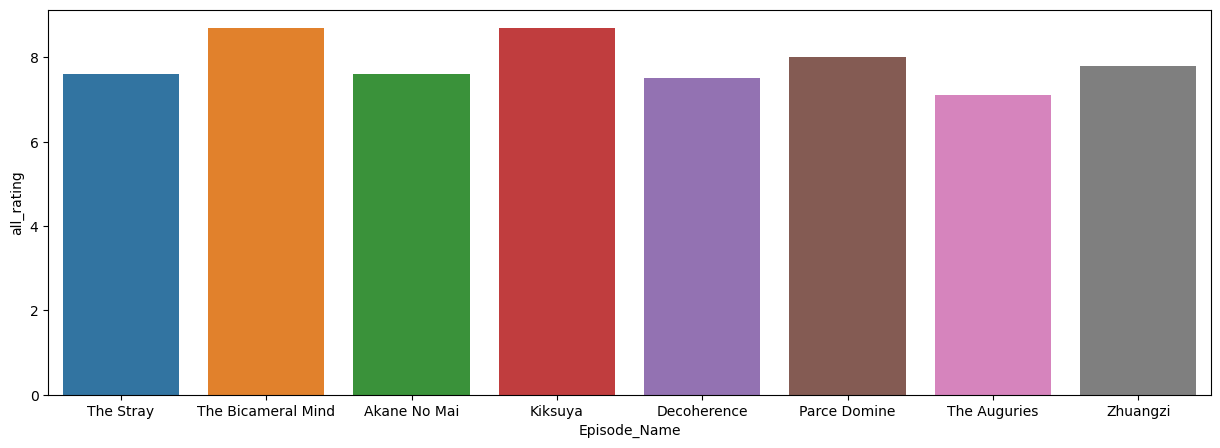

In [133]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Episode_Name', y='all_rating', data=new_df)
plt.show()

## Get the summary for the most popular ( ratings ) episode in every season

In [134]:
a[0:10].loc[a['average-rating'] == s1_max, 'summary'].values[0]

"Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative."

In [135]:
a[10:20].loc[a['average-rating'] == s2_max, 'summary'].values[0]

"Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering."

In [136]:
a[20:28].loc[a['average-rating'] == s3_max, 'summary'].values[0]

"If you're stuck in a loop, try walking in a straight line."

In [137]:
a[28:].loc[a['average-rating'] == s4_max, 'summary'].values[0]

'God is bored.'